 ## Numerical information extraction from image data

We are going to use a basic shapes file. [here](https://drive.google.com/file/d/1btB70ALZzjIalBDr8-SPDAlwGouNDnOM/view?usp=sharing).

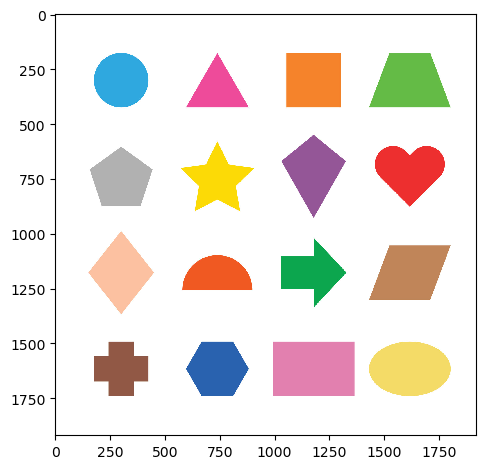

In [ ]:
from skimage import io

shapes_image = io.imread('shapes.jpg')
io.imshow(shapes_image)

### 1 - Basic Measurements

We will try to extract different pieces of information from each shape. For example, area, perimeter and centroid. To do that, we will need to follow a series of steps.

\**a)** Convert the image to grayscale

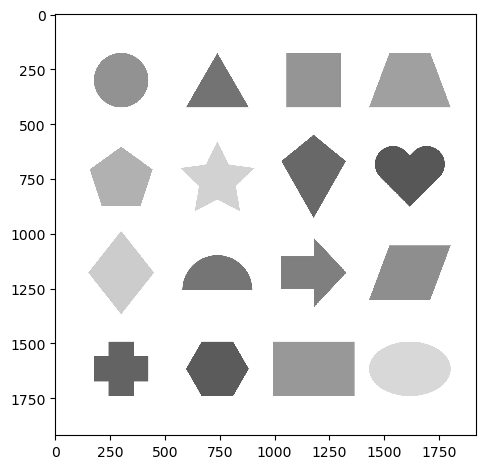

In [ ]:
from skimage import color
from skimage.filters import sobel
from skimage import io
import matplotlib.pyplot as plt  # For plotting
from skimage.color import rgb2gray
import numpy as np

shapes_image
# Make the image grayscale using rgb2gray
image_gray = rgb2gray(shapes_image)

io.imshow(image_gray)

**b)** Identify a threshold to separate the images from the background. We can apply the [threshold_otsu](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu) method, but it might not contain all the shapes. We can try to work from it and identify a binary image that contains all the shapes.

In [ ]:
from skimage.filters import threshold_otsu # For Otsu's thresholding method

In [ ]:
thresh = threshold_otsu(image_gray) # Apply Otsu's method to determine an optimal threshold
print("Otsu's Threshold:", thresh) # Print the threshold value to check what Otsu's method calculated

Otsu's Threshold: 0.7501636565563726


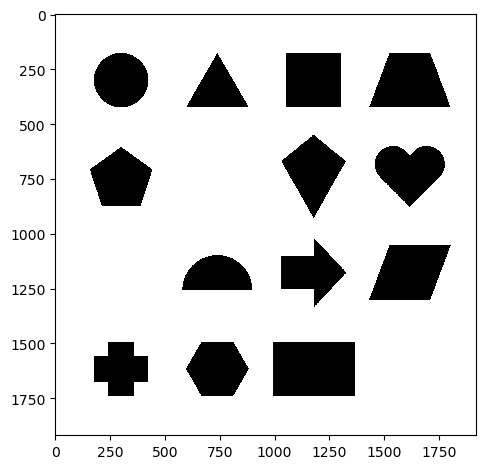

In [ ]:
# Create a binary image using Otsu's threshold
binary = image_gray > thresh  # Pixels >= threshold are set to True (white), others to False (black)

# Show the image​
io.imshow(binary)

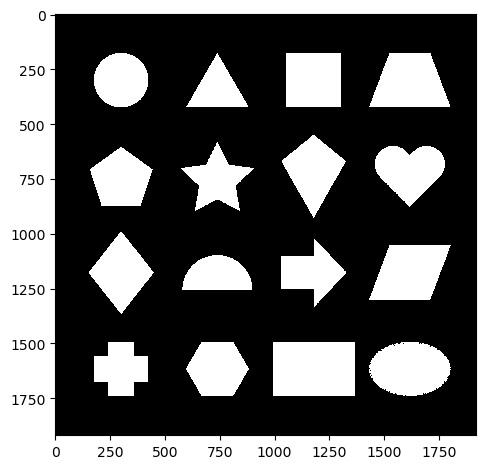

In [ ]:
# Manually set a custom threshold as Otsu's method does not capture all shapes
manual_threshold = 0.85 # This value seems to work best for the image

# Create a binary image using the custom threshold
binary_manual = image_gray < manual_threshold

io.imshow(binary_manual)

#Lucas Rizzo
#10:25 PM
#I think you just need to change this line
#binary_manual = image_gray >= manual_threshold
#try
#binary_manual = image_gray < manual_threshold
#instead of >=, use <

**c)** Using the [`measure.label`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) method to create a laballed image for your binary image in b). We might need to use the `connectivity` parameter.

In [ ]:
from skimage.measure import label  # For labeling connected components

# https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label

In [ ]:
# Label the connected regions in the binary image
# The connectivity parameter defines the connectivity rule (1 for 4-connectivity, 2 for 8-connectivity)
#labeled_image = label(binary_manual, connectivity=2)

# Label the connected regions in the binary image
labeled_image, num_labels = label(binary_manual, connectivity=2, background=0, return_num=True)

# Print the number of labels to ensure regions are being identified
print(f"Number of labeled regions: {num_labels}")

Number of labeled regions: 16


**d)** Use the [`measure.regionprops`](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) passing the labelled image. This method will return a iterable object, with information about each labelled region in the image. Check what are the attributes of each object. Print area, perimeter and centroid.

In [ ]:
from skimage.measure import regionprops

# https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

# measure.regionprops method provides detailed information about each labeled region in an image.
# This method will allow us to extract attributes like area, perimeter, and centroid for each region (shape) in the labeled image.

In [ ]:
regions = regionprops(labeled_image)

# Loop through each region and print the area, perimeter, and centroid
for region in regions:
    print(f"Region {region.label}:")
    print(f"  - Area: {region.area} pixels")
    print(f"  - Perimeter: {region.perimeter:.2f} pixels")
    print(f"  - Centroid: {region.centroid}")
    print("-" * 30)  # Separator for clarity

Region 1:
  - Area: 48609.0 pixels
  - Perimeter: 821.54 pixels
  - Centroid: (301.20973482276946, 301.224402888354)
------------------------------
Region 2:
  - Area: 62001.0 pixels
  - Perimeter: 992.00 pixels
  - Centroid: (301.0, 1179.0)
------------------------------
Region 3:
  - Area: 69604.0 pixels
  - Perimeter: 1129.04 pixels
  - Centroid: (314.8602810183323, 1617.7936181828632)
------------------------------
Region 4:
  - Area: 35842.0 pixels
  - Perimeter: 899.05 pixels
  - Centroid: (342.45496903074604, 740.0650354332905)
------------------------------
Region 5:
  - Area: 56246.0 pixels
  - Perimeter: 1032.36 pixels
  - Centroid: (716.9383067240337, 1178.9207765885574)
------------------------------
Region 6:
  - Area: 45275.0 pixels
  - Perimeter: 1231.63 pixels
  - Centroid: (756.882186637217, 740.0650911098841)
------------------------------
Region 7:
  - Area: 58107.0 pixels
  - Perimeter: 982.62 pixels
  - Centroid: (713.2986559278572, 1617.820314247853)
-------------

**e)** The label function won't return the labels in any specific order. To identify which shape corresponds to each region, we use the centroid value again, and add the image number over the shape.

In [ ]:
# Approximate row thresholds

# Assign each region to a row group based on its y-coordinate (row value)
for region in centroids:
    for i, threshold in enumerate(row_thresholds):
        if region[1] <= threshold:
            row_groups[i].append(region)
            break

#  Print the sorted regions
print("Sorted Regions (Grouped by Rows, Ordered by Columns):")
for region in sorted_regions:
    print(f"  Label {region[0]} at Row: {region[1]:.2f}, Column: {region[2]:.2f}")

Sorted Regions (Grouped by Rows, Ordered by Columns):
  Label 1 at Row: 301.21, Column: 301.22
  Label 4 at Row: 342.45, Column: 740.07
  Label 2 at Row: 301.00, Column: 1179.00
  Label 3 at Row: 314.86, Column: 1617.79
  Label 8 at Row: 754.41, Column: 301.22
  Label 6 at Row: 756.88, Column: 740.07
  Label 5 at Row: 716.94, Column: 1178.92
  Label 7 at Row: 713.30, Column: 1617.82
  Label 9 at Row: 1178.93, Column: 301.22
  Label 12 at Row: 1191.24, Column: 740.06
  Label 10 at Row: 1178.95, Column: 1168.51
  Label 11 at Row: 1179.00, Column: 1617.75
  Label 13 at Row: 1618.00, Column: 301.00
  Label 14 at Row: 1617.93, Column: 740.07
  Label 15 at Row: 1618.00, Column: 1179.00
  Label 16 at Row: 1617.73, Column: 1617.84


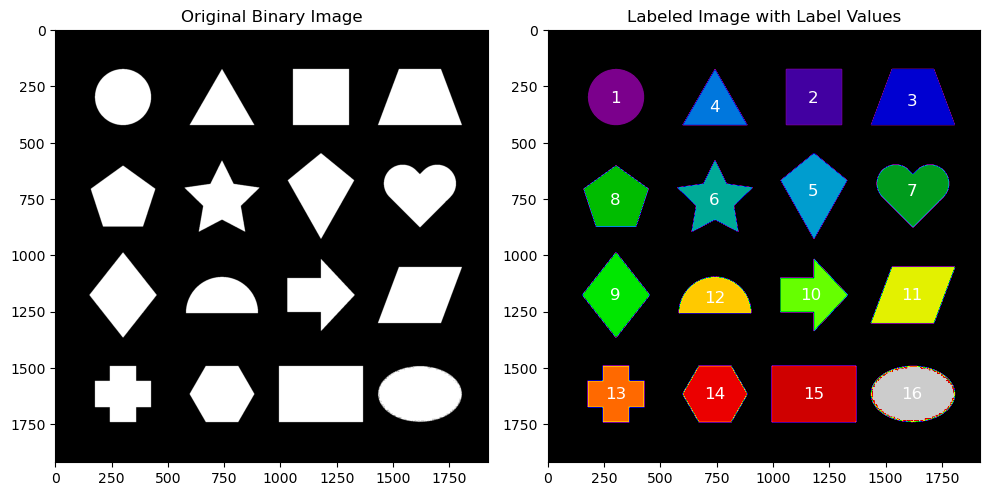

In [ ]:
binary_image = binary_manual  # Binary image from step b) created with the manual threshold.
label_image = labeled_image   # This is the labeled image from step c) created with skimage.measure.label

# Visualize the original binary image and the labeled image with label values
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original binary image
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Original Binary Image')

# Labeled image with label values overlaid
axes[1].imshow(label_image, cmap='nipy_spectral')

# Annotate each labeled region with its label value
for region in regionprops(label_image):
    # Get the coordinates of the region centroid
    centroid = region.centroid
    # Get the label of the region
    label = region.label

    # Add the label as text at the centroid (rounded to nearest pixel)
    axes[1].text(centroid[1], centroid[0], str(label), color='white',
                 fontsize=12, ha='center', va='center')

# Title for the labeled image
axes[1].set_title('Labeled Image with Label Values')

# Display the plot
plt.tight_layout()
plt.show()

### 2 - Intensity Statistics

The mean intensity value of a single color channel provides information about the average brightness or intensity of that specific color within the image or a region of that image. The mean intensity value for a specific channel gives an average measure of the brightness of that color across the entire image. Let's have a look at intensity values for the previous shapes figure.

**a)** In the original figure shapes have different colors. We are going to use `measure.regionprops` again to compute the mean and standard deviation intensity of pixel values for each region. We will need to do that for each color channel.

We use the `intensity_image` parameter of `regionprops` passing a image with a single color channel. To get a image with a single color channel we can slice the image for all rows and coluns, but a single color channel. Next, we can use the numpy methods `mean` and `std` to get the mean and std from the `intensity_image` attribute returned by regionprops object.

In [ ]:
# Slice the image into color channels
red_channel = shapes_image[:, :, 0]
green_channel = shapes_image[:, :, 1]
blue_channel = shapes_image[:, :, 2]

# Dictionaries to store mean and standard deviation values
intensity_stats = {'Red': [], 'Green': [], 'Blue': []}

# Iterate through each color channel and calculate mean and std for each region
for color_channel, color_name in zip([red_channel, green_channel, blue_channel], intensity_stats.keys()):
    # Reference: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops
    regions = regionprops(labeled_image, intensity_image=color_channel)

    for region in regions:
        # Extract mean and standard deviation of intensity for this region
        mean_intensity = np.mean(region.intensity_image[region.image])
        std_intensity = np.std(region.intensity_image[region.image])

        # Append results to the respective color channel's list
        intensity_stats[color_name].append({'label': region.label,
                                            'mean': mean_intensity,
                                            'std': std_intensity})

In [ ]:
# Display the computed intensity statistics
for color, stats in intensity_stats.items():
    print(f"Intensity statistics for {color} channel:")
    for stat in stats:
        print(f"  Region {stat['label']}: Mean = {stat['mean']:.2f}, Std = {stat['std']:.2f}")
    print("-" * 50)

Intensity statistics for Red channel:
  Region 1: Mean = 47.89, Std = 9.00
  Region 2: Mean = 245.05, Std = 0.93
  Region 3: Mean = 100.61, Std = 5.70
  Region 4: Mean = 238.12, Std = 1.66
  Region 5: Mean = 148.70, Std = 6.10
  Region 6: Mean = 251.88, Std = 1.04
  Region 7: Mean = 237.14, Std = 1.75
  Region 8: Mean = 177.24, Std = 2.43
  Region 9: Mean = 251.92, Std = 0.94
  Region 10: Mean = 14.15, Std = 16.35
  Region 11: Mean = 192.28, Std = 2.60
  Region 12: Mean = 240.18, Std = 1.55
  Region 13: Mean = 145.76, Std = 6.19
  Region 14: Mean = 42.20, Std = 10.88
  Region 15: Mean = 226.12, Std = 1.29
  Region 16: Mean = 243.98, Std = 0.55
--------------------------------------------------
Intensity statistics for Green channel:
  Region 1: Mean = 168.38, Std = 3.79
  Region 2: Mean = 131.55, Std = 4.95
  Region 3: Mean = 187.28, Std = 2.57
  Region 4: Mean = 76.26, Std = 9.46
  Region 5: Mean = 87.08, Std = 9.45
  Region 6: Mean = 218.04, Std = 0.83
  Region 7: Mean = 48.47, Std =

**b)** Plot three bar charts (one for each color channel) comparing the mean intensity of all shapes. We can create a list with all the mean intensity values to use in the plot.



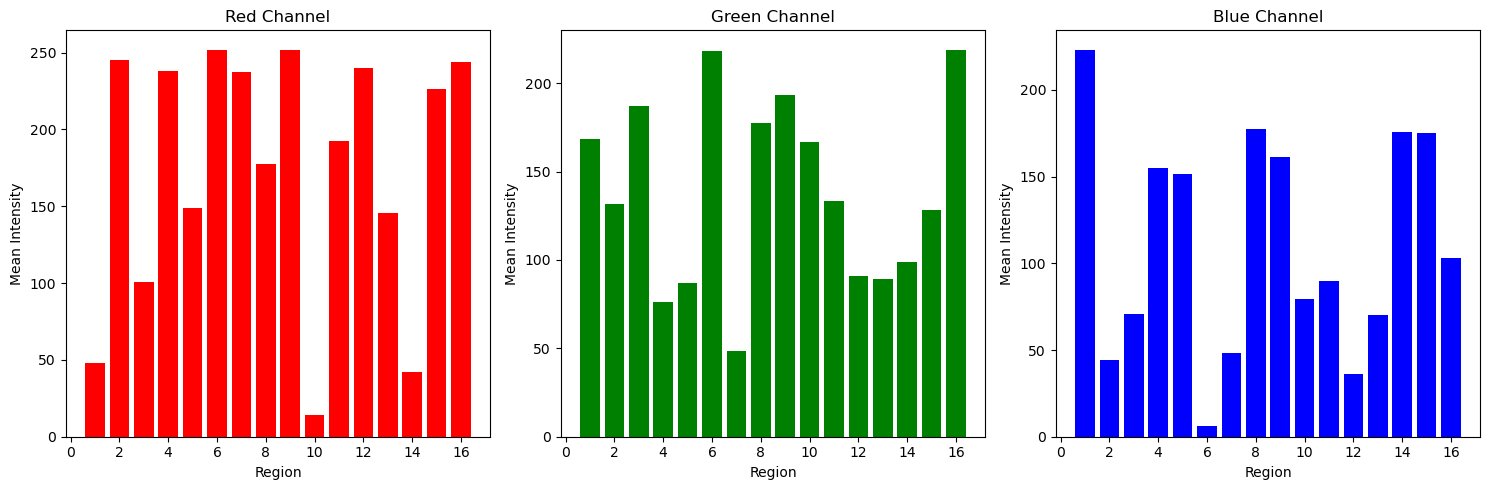

In [ ]:
# Create separate lists of mean intensities for each color channel
mean_intensities_red = [stat['mean'] for stat in intensity_stats['Red']]
mean_intensities_green = [stat['mean'] for stat in intensity_stats['Green']]
mean_intensities_blue = [stat['mean'] for stat in intensity_stats['Blue']]

# Generate bar charts for each color channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Red Channel
axes[0].bar(range(1, len(mean_intensities_red) + 1), mean_intensities_red, color='red')
axes[0].set_title("Red Channel")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Mean Intensity")

# Green Channel
axes[1].bar(range(1, len(mean_intensities_green) + 1), mean_intensities_green, color='green')
axes[1].set_title("Green Channel")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Mean Intensity")

# Blue Channel
axes[2].bar(range(1, len(mean_intensities_blue) + 1), mean_intensities_blue, color='blue')
axes[2].set_title("Blue Channel")
axes[2].set_xlabel("Region")
axes[2].set_ylabel("Mean Intensity")

plt.tight_layout()
plt.show()

### 3 - Histogram Analysis

Another way to evaluate pixel value information is by histograms.

**a)** We plot the histogram of pixel values in the red channel for each shape in the original image. We can use [exposure.histogram](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.histogram) method to extract the histogram array and bin centers of each histogram bin.

In [ ]:
from skimage import exposure  # Importing the exposure module
from skimage.exposure import histogram
from skimage import data, exposure, img_as_float

Region 1 - Min Intensity: 32, Max Intensity: 192
Region 2 - Min Intensity: 233, Max Intensity: 255
Region 3 - Min Intensity: 84, Max Intensity: 195
Region 4 - Min Intensity: 218, Max Intensity: 255
Region 5 - Min Intensity: 131, Max Intensity: 241
Region 6 - Min Intensity: 236, Max Intensity: 255
Region 7 - Min Intensity: 220, Max Intensity: 255
Region 8 - Min Intensity: 170, Max Intensity: 216
Region 9 - Min Intensity: 237, Max Intensity: 255
Region 10 - Min Intensity: 0, Max Intensity: 186
Region 11 - Min Intensity: 181, Max Intensity: 241
Region 12 - Min Intensity: 226, Max Intensity: 255
Region 13 - Min Intensity: 131, Max Intensity: 212
Region 14 - Min Intensity: 26, Max Intensity: 209
Region 15 - Min Intensity: 216, Max Intensity: 247
Region 16 - Min Intensity: 233, Max Intensity: 252


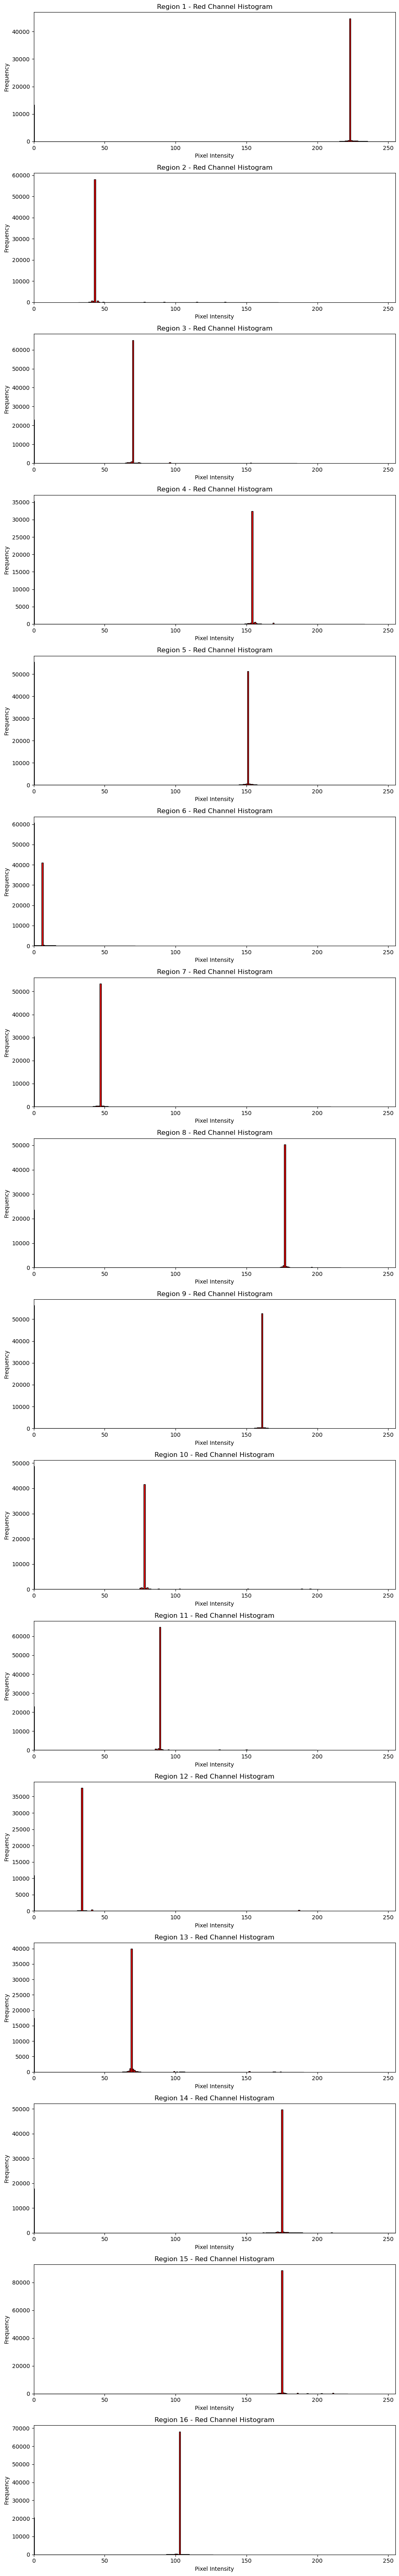

In [ ]:
# Extract the red channel from the original image for analysis
red_channel = shapes_image[:, :, 0]  # Isolating the red component of the RGB image

# Compute region properties for each labeled region using the red channel as the intensity imageregions = regionprops(labeled_image, intensity_image=red_channel)

# Set up a plot with subplots for histograms of all shapes
fig, axes = plt.subplots(len(regions), 1, figsize=(10, 4 * len(regions)))

# Loop through all labeled regions and print min/max intensity
for region in regionprops(labeled_image, intensity_image=red_channel):
    region_pixels = red_channel[region.coords[:, 0], region.coords[:, 1]]  # Get pixel values for the region
    print(f"Region {region.label} - Min Intensity: {region_pixels.min()}, Max Intensity: {region_pixels.max()}")

# Iterate over each region and compute the histogram for its red channel values
for i, region in enumerate(regions):
    # Extract pixel intensities in the red channel for the current region
    region_pixels = region.intensity_image[region.image]  # Pixels from the region mask

    # Compute histogram using skimage.exposure.histogram
    hist, bin_centers = exposure.histogram(region.intensity_image)

    # Plot the histogram
    axes[i].bar(bin_centers, hist, width=1, edgecolor="black", color="red")
    axes[i].set_xlim(0, 255)  # Ensure consistent x-axis range
    axes[i].set_title(f"Region {region.label} - Red Channel Histogram")
    axes[i].set_xlabel("Pixel Intensity")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

**b)** After analysing the histograms in a), we modify the original shapes image and keep only the shapes with high frequency of strong red values (pixels from 100 to 255 with higher frequency in the red color channel).

We can check if the sum of frequencies in the histogram from index 0 up to 100 is lower than the sum of frequencies for indexes from 101 until 255. If they are, we extract the bounding box of the region, with the [bbox](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) property of the region, and set all pixel values in the region to 255 (in all color channels).

We show the original image without the shapes with low frequency of strong red values.

The histogram might not have indexes up to 255.

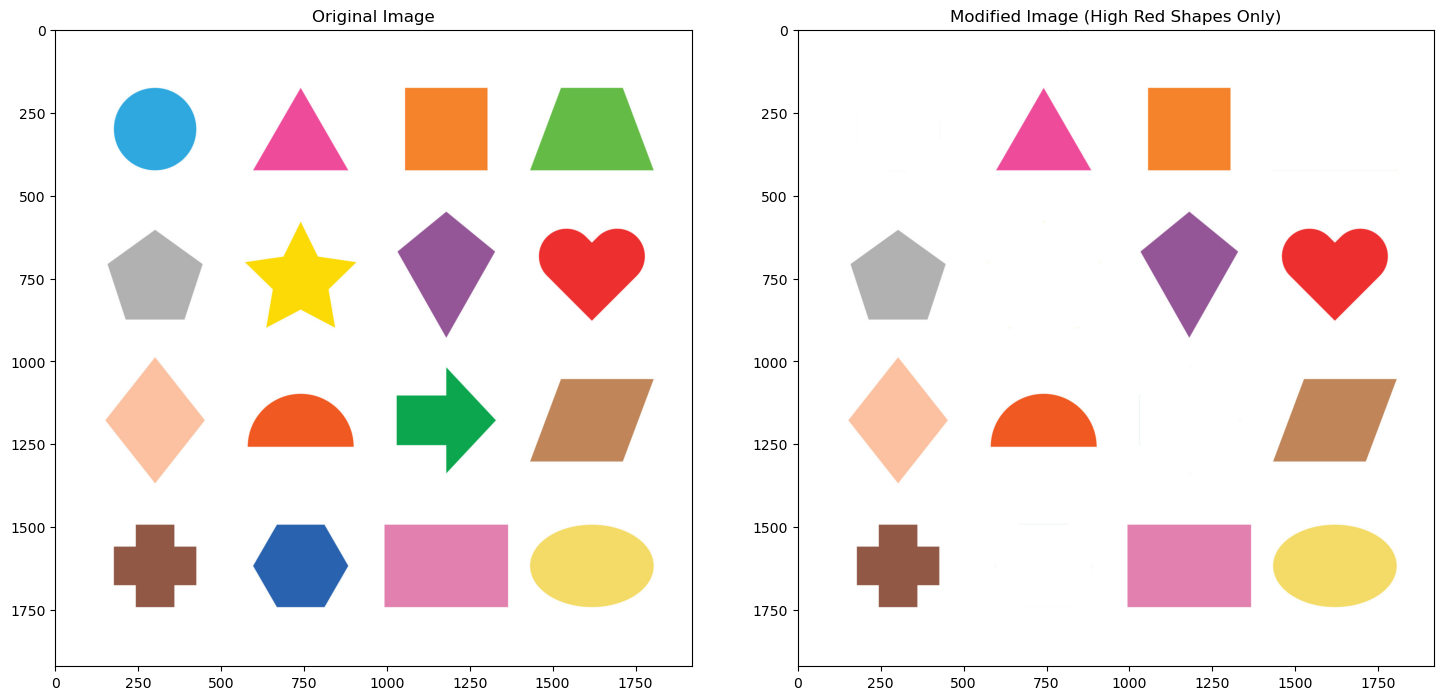

In [ ]:
# Loop through all labeled regions
for region in regionprops(labeled_image, intensity_image=red_channel):

    # Compute frequency sums for low and high intensity ranges
    low_red = np.sum(hist[:101])  # Intensities 0–100
    high_red = np.sum(hist[101:])  # Intensities 101–255

    # Check if high red frequency is greater than low red frequency
    if high_red < low_red:
        # Extract the bounding box for the region
        minr, minc, maxr, maxc = region.bbox
        # Set all pixel values in the region to white (255, 255, 255)
        modified_image[minr:maxr, minc:maxc] = 255  # All channels to white

# Display the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Original image
axes[0].imshow(shapes_image)
axes[0].set_title("Original Image")

# Modified image
axes[1].imshow(modified_image)
axes[1].set_title("Modified Image (High Red Shapes Only)")

plt.tight_layout()
plt.show()

**c)** Filtering shapes by the frequency of strong red values, is just way one of analysing the image. This should allow to create other custom metrics and identify reagions of interest in an image. For example, the ratio of the area of a region to its bounding box area can provide insights into how "compact" or "spread out" each labeled region is.

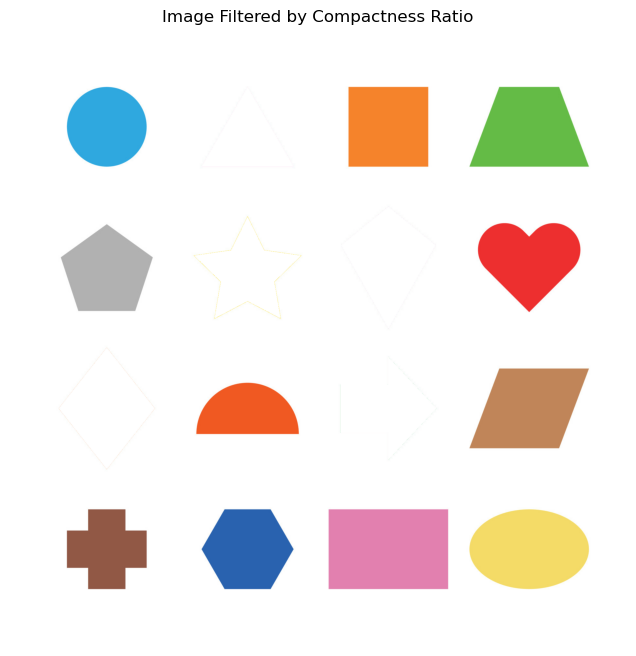

In [ ]:
# Create a copy of the image to modify for custom metric
compactness_image = shapes_image.copy()

# Define a threshold for compactness ratio
compactness_threshold = 0.6

# Analyze regions and apply custom metric
for region in regions:
    # Calculate the area of the shape and its bounding box
    region_area = region.area
    bbox_area = (region.bbox[2] - region.bbox[0]) * (region.bbox[3] - region.bbox[1])

    # Compute compactness ratio
    compactness_ratio = region_area / bbox_area

    if compactness_ratio < compactness_threshold:
        compactness_image[region.coords[:, 0], region.coords[:, 1], :] = [255, 255, 255]  # Set to white

# Display the compactness-filtered image
plt.figure(figsize=(10, 8))
plt.imshow(compactness_image)
plt.title("Image Filtered by Compactness Ratio")
plt.axis('off')
plt.show()


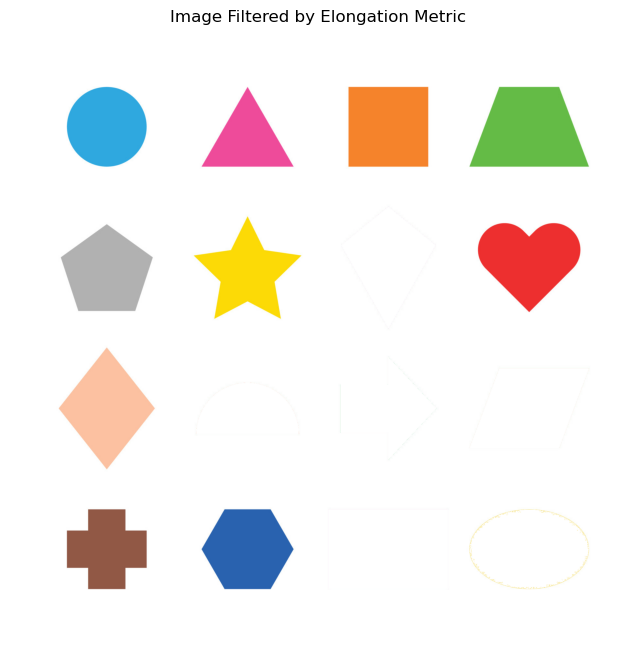

In [ ]:
# Create a copy of the image to modify for elongation metric
elongation_image = shapes_image.copy()

# Define a threshold for elongation ratio
elongation_threshold = 1.3

# Analyze regions and apply custom metric
for region in regions:
    # Ensure the region has major and minor axis lengths
    if region.major_axis_length > 0 and region.minor_axis_length > 0:
        # Calculate elongation ratio
        elongation_ratio = region.major_axis_length / region.minor_axis_length

        if elongation_ratio > elongation_threshold:
            elongation_image[region.coords[:, 0], region.coords[:, 1], :] = [255, 255, 255]  # Set to white

# Display the elongation-filtered image
plt.figure(figsize=(10, 8))
plt.imshow(elongation_image)
plt.title("Image Filtered by Elongation Metric")
plt.axis('off')
plt.show()


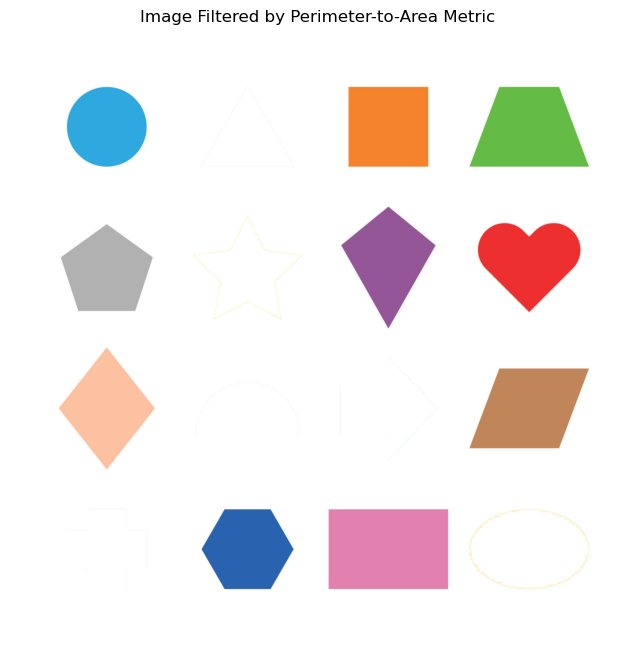

In [ ]:
# Create a copy of the image to modify for perimeter-to-area ratio metric
complexity_image = shapes_image.copy()

# Define a threshold for perimeter-to-area ratio
complexity_threshold = 0.02

# Analyze regions and apply custom metric
for region in regions:
    if region.area > 0:  # Avoid division by zero
        complexity_ratio = region.perimeter / region.area

        if complexity_ratio > complexity_threshold:
            complexity_image[region.coords[:, 0], region.coords[:, 1], :] = [255, 255, 255]  # Set to white

# Display the complexity-filtered image
plt.figure(figsize=(10, 8))
plt.imshow(complexity_image)
plt.title("Image Filtered by Perimeter-to-Area Metric")
plt.axis('off')
plt.show()

###**4- Report**

We worked with image files to perform various analyses and manipulations.
The project involved the following key steps:

- Computed individual object properties (e.g., area and perimeter) after applying segmentation.
- Used regionprops from skimage.measure to calculate features like eccentricity, equivalent diameter, and bounding box for identified shapes.
- Compared results from different segmentation methods (e.g., manual thresholding vs. Otsu’s method) and visualized the differences in shape detection accuracy.
- Superimposed labeled regions on the original image to visually inspect segmentation accuracy.
- Generated color-coded overlays for regions based on extracted properties, such as intensity and eccentricity.
- Quantified discrepancies between segmentation methods by comparing areas and perimeters of detected regions.
- Applied histogram analysis to identify and retain only regions with a high frequency of strong red values (intensity > 100).
- Experimented with custom metrics such as compactness ratio, elongation, aspect ratio, and perimeter-to-area ratio to analyze the shapes and understand their geometric properties.

##### Challenges Faced and Resolutions
- Challenge: Otsu’s method did not perfectly separate all shapes from the background.
- Resolution: Experimented with manual thresholding to create a binary image containing all shapes.

- Challenge: Understanding the histogram analysis of color channels and its implications.
- Resolution: Interpreted the results by comparing the red, green, and blue channels and adjusted processing steps accordingly.

- Challenge: Debugging histogram bin alignment and ensuring that frequency calculations accurately reflected intensity ranges.
- Resolution: Adjusted scaling and indexing of histogram bins and validated results by comparing numerical outputs with visualized histograms.

##### Skills and Concepts
- Learning about thresholding techniques for segmentation, including their limitations made me gained practical experience with Python libraries (skimage, matplotlib) for image preprocessing and analysis.

- Managing large datasets and optimizing processing pipelines made me acquired valuable skills for data handling and automation in Python.

- Understanding the relationship between image pixel intensity distributions and their real-world implications, such as identifying color-based patterns or anomalies.

- Learning to extract, analyze, and visualize object-level properties from segmented images, reinforcing a connection between theoretical image processing and its practical applications.